## **Title**

**Prototype: Real-Time Energy Consumption Tracker**

---

## **Purpose**

This prototype simulates real-time energy consumption monitoring for household devices. It is intended to demonstrate basic stream processing capabilities, data aggregation, and simple visualization as a foundation for more complex energy monitoring systems.

---

## **Problem Statement**

As energy consumption increases and sustainability becomes a priority, there is a growing need for real-time energy usage tracking at the device level. This prototype aims to provide a lightweight framework to simulate and visualize such usage.

---

## **Design Overview**

### **Components**

* **Data Generator:** Simulates device usage values between 50–500W at 1-second intervals.
* **Aggregator:** Maintains cumulative usage totals.
* **Visualizer:** Updates a bar chart of total usage over time.

### **Technology Stack**

* `Python`, `matplotlib`, `pandas`, `Counter` from `collections`

---



## **Design Decisions**

* **Streaming via Generator:** Simulates continuous data input instead of batch processing.
* **Bar Chart for Visualization:** Chosen for its simplicity and clarity in showing totals.
* **`Counter` Used for Aggregation:** Efficient for frequency-style data and summing.

---

## **Trade-offs**

| Decision              | Pros                       | Cons                                                    |
| --------------------- | -------------------------- | ------------------------------------------------------- |
| Use of `matplotlib`   | Quick, flexible            | Not optimal for high-speed real-time charts             |
| In-memory aggregation | Simple, no database needed | Doesn’t scale for large or long-running streams         |
| 1-second interval     | Easy to visualize          | Not configurable, fixed-rate limits testing flexibility |

---

## **Future Work**

* Add persistent storage (e.g., SQLite or AWS Timestream)
* Support for real-time dashboards (e.g., `Plotly Dash`, `Bokeh`)
* Device normalization based on power rating
* Extend to IoT device ingestion via MQTT or Kinesis

---

## **Conclusion**

This prototype demonstrates a foundation for real-time energy usage tracking, simulating live data and aggregating it for analysis. Future iterations should explore persistence, scale, and richer visualizations to align with production readiness.



## **Code Summary**

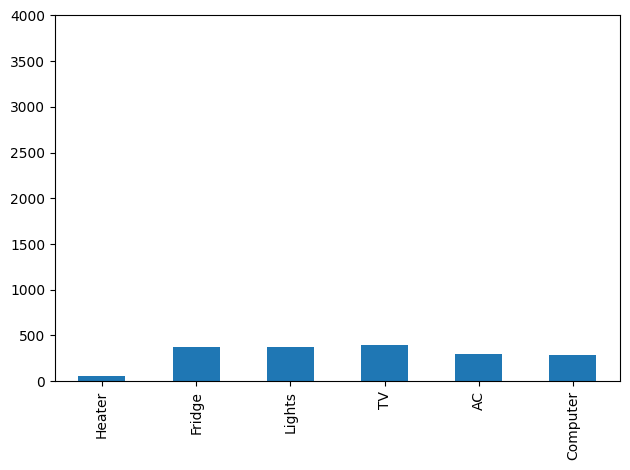

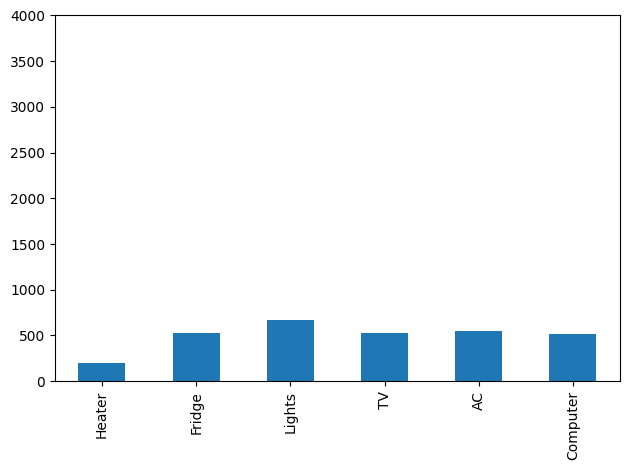

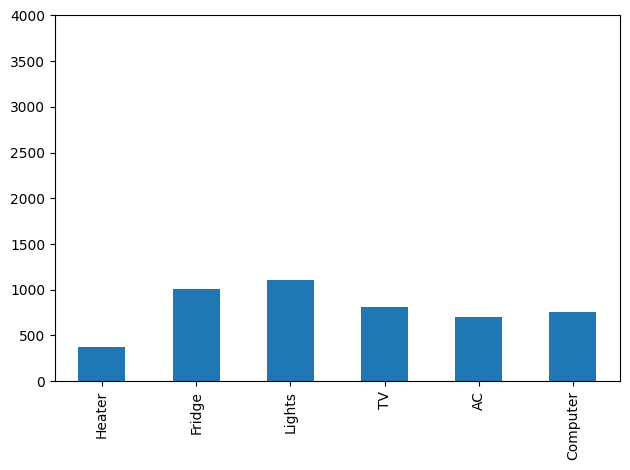

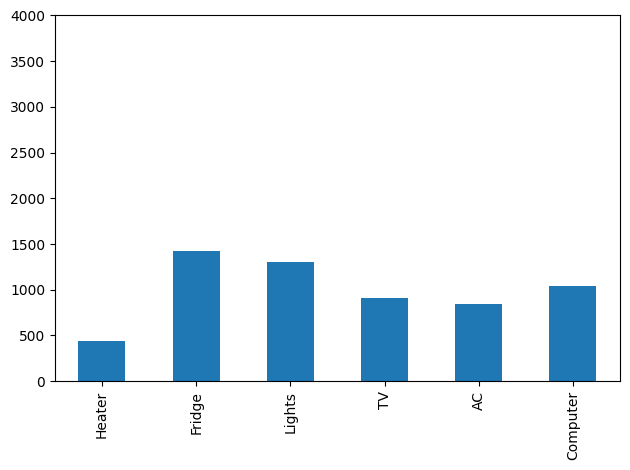

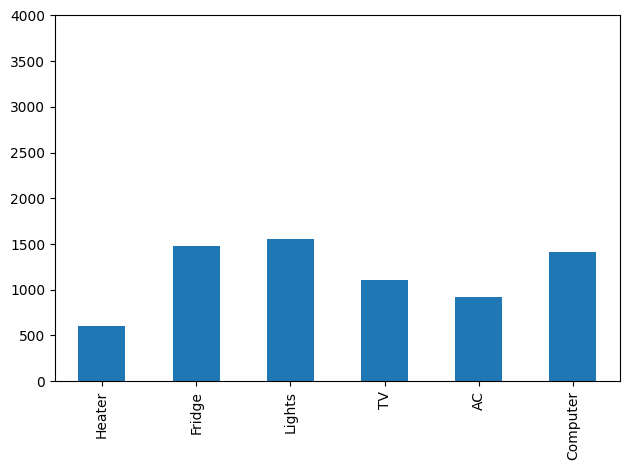

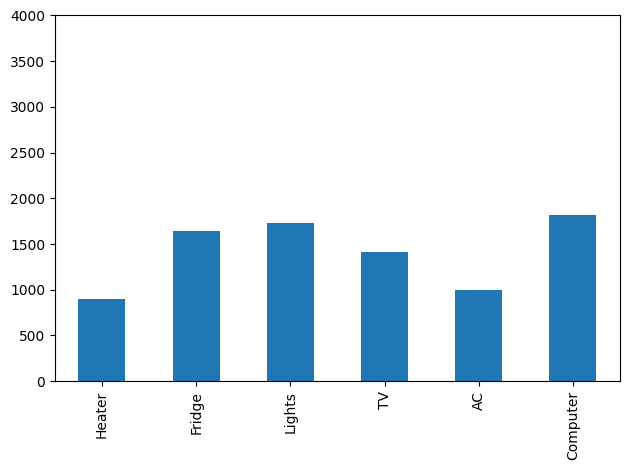

Time limit reached. Terminating the stream processing.


In [6]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def generate_mock_data():
    DEVICES = ["Heater", "Fridge", "Lights", "TV", "AC", "Computer"]
    while True:
        record = {device: random.randint(50, 500) for device in DEVICES}
        yield record
        time.sleep(1)

d1 = Counter()

def load_data(record):
    global d1
    d1 += Counter(record)
    pd.Series(d1).plot(kind='bar')
    plt.ylim(0, 4000) 
    plt.tight_layout()
    plt.show()

def process_stream(run_time_seconds):
    start_time = time.time()
    for record in generate_mock_data():
        load_data(record)
        if time.time() - start_time > run_time_seconds:
            print("Time limit reached. Terminating the stream processing.")
            break


process_stream(5)
